In [9]:
#cd /g/data/fu5/deg581/

In [10]:
### new loads
import numpy.matlib
from xgcm import Grid
import matplotlib.ticker as mticker
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import numpy as np
import cmocean.cm as cmo
import matplotlib.gridspec as gridspec

In [11]:
import seawater as sw

In [12]:
s = [[0, 40],[0, 40]]
p = [[0, 0], [1800, 1800]]
fp = sw.fp(s, p)
fp0  = fp[0]
fpDepth = fp[1]


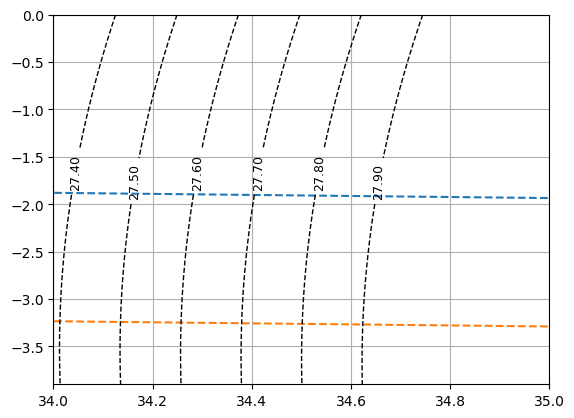

In [25]:
smin = 30
smax = 40
tmin = -4
tmax = 0

xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)/0.1+1,0))

dens = np.zeros((ydim,xdim))

ti = np.linspace(1,ydim-1,ydim)*0.1+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin

for j in range(0, ydim):
    for i in range(0,xdim):
        dens[j,i]=sw.pden(si[i],ti[j],0)

dens0 = dens-1000

fig,ax=plt.subplots()

ax.plot(s[0],fp0,'--')
ax.plot(s[1],fpDepth,'--')

CS = plt.contour(si,ti,dens0, levels=np.arange(27,28,0.1), linestyles='dashed', colors='k',linewidths=1)
plt.clabel(CS, fontsize=9, inline=1, fmt='%2.2f') # Label every second level

ax.set_xlim([34,35])
# ax.set_ylim([-4,0.5])
ax.grid()

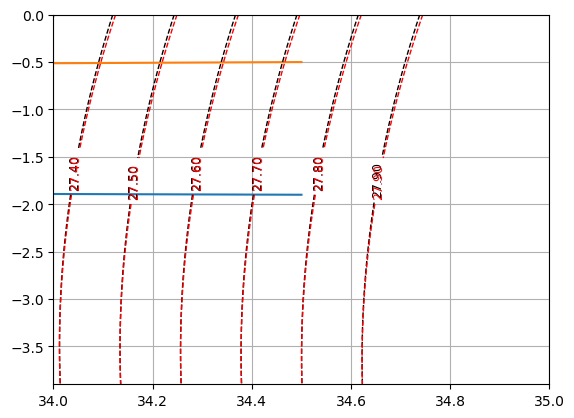

In [31]:
# repeat for at 1800m

smin = 30
smax = 40
tmin = -4
tmax = 0

xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)/0.1+1,0))

dens = np.zeros((ydim,xdim))

ti = np.linspace(1,ydim-1,ydim)*0.1+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin

for j in range(0, ydim):
    for i in range(0,xdim):
        dens[j,i]=sw.pden(si[i],ti[j],1800)

dens1800 = dens-1000

fig,ax=plt.subplots()

# ax.plot(s[0],fp0,'--')
# ax.plot(s[1],fpDepth,'--')

SD_coord=[0,fpDepth[0]]
Ambient_coord1=[34.5,-0.5]
Ambient_coord2=[34.5,-1.9]
ax.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1')
ax.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0')

CS = plt.contour(si,ti,dens1800, levels=np.arange(27,28,0.1), linestyles='dashed', colors='k',linewidths=1)
plt.clabel(CS, fontsize=9, inline=1, fmt='%2.2f') # Label every second level
CS2 = plt.contour(si,ti,dens0, levels=np.arange(27,28,0.1), linestyles='dashed', colors='r',linewidths=1)
plt.clabel(CS2, fontsize=9, inline=1, fmt='%2.2f') # Label every second level

ax.set_xlim([34,35])
# ax.set_ylim([-4,0.5])
ax.grid()


In [15]:
# line for SD mixture

SD_coord=[0,fpDepth[0]]
Ambient_coord1=[34.5,-0.5]
Ambient_coord2=[34.5,-1.9]

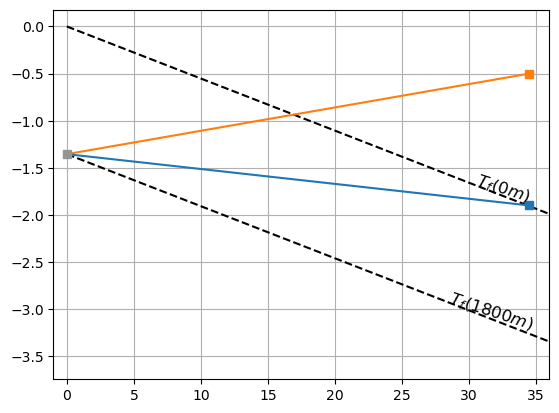

In [16]:
fig,ax=plt.subplots()

ax.plot(s[0],fp0,'--',color='k')
ax.text(30,-1.8615366975842442,' $T_{f}(0 m)$',fontsize=12,rotation=-18)
ax.plot(s[1],fpDepth,'--',color='k')
ax.text(28,-3.2166114796365517,' $T_{f}(1800 m)$',fontsize=12,rotation=-18)

# CS = plt.contour(si,ti,dens, levels=np.arange(27,28,0.1), linestyles='dashed', colors='k',linewidths=1)
# plt.clabel(CS, fontsize=9, inline=1, fmt='%2.2f') # Label every second level

ax.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1')
ax.plot(Ambient_coord1[0],Ambient_coord1[1],'s',color='C1')

ax.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0')
ax.plot(Ambient_coord2[0],Ambient_coord2[1],'s',color='C0')

ax.plot(SD_coord[0],SD_coord[1],'s',color='xkcd:grey')


ax.set_xlim([-1,36])
# ax.set_ylim([-4,0.5])
ax.grid()

<Figure size 640x480 with 0 Axes>

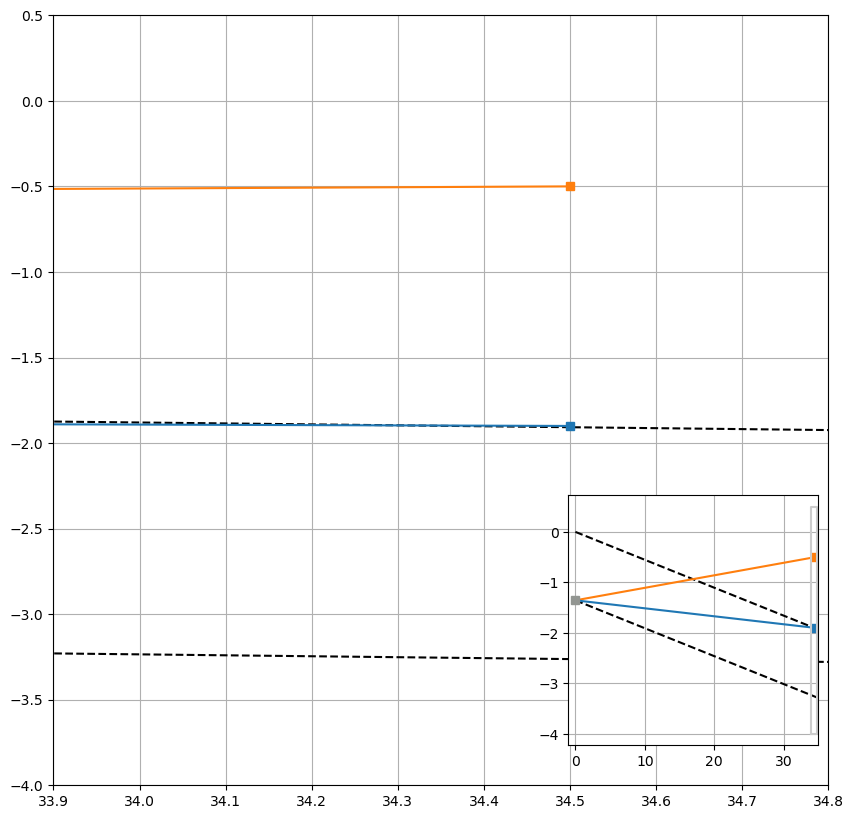

In [17]:
axlims=[33.9,34.8,-4,0.5]


gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.00)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,10])
ax = None

ax = fig.add_subplot(gs[0,0])

ax.plot(s[0],fp0,'--',color='k')
# ax.text(30,-1.8615366975842442,' $T_{f}(0 m)$',fontsize=12,rotation=-18)
ax.plot(s[1],fpDepth,'--',color='k')
# ax.text(28,-3.2166114796365517,' $T_{f}(1800 m)$',fontsize=12,rotation=-18)

# CS = plt.contour(si,ti,dens, levels=np.arange(27,28,0.1), linestyles='dashed', colors='k',linewidths=1)
# plt.clabel(CS, fontsize=9, inline=1, fmt='%2.2f') # Label every second level

ax.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1')
ax.plot(Ambient_coord1[0],Ambient_coord1[1],'s',color='C1')

ax.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0')
ax.plot(Ambient_coord2[0],Ambient_coord2[1],'s',color='C0')

ax.plot(SD_coord[0],SD_coord[1],'s',color='xkcd:grey')


ax.set_xlim([axlims[0],axlims[1]])
ax.set_ylim([axlims[2],axlims[3]])
ax.grid()



axins = fig.add_axes([.64, 0.15, 0.25, 0.25])
axins.plot(s[0],fp0,'--',color='k')
# axins.text(30,-1.8615366975842442,' $T_{f}(0 m)$',fontsize=12,rotation=-18)
axins.plot(s[1],fpDepth,'--',color='k')
# axins.text(28,-3.2166114796365517,' $T_{f}(1800 m)$',fontsize=12,rotation=-18)

# CS = plt.contour(si,ti,dens, levels=np.arange(27,28,0.1), linestyles='dashed', colors='k',linewidths=1)
# plt.clabel(CS, fontsize=9, inline=1, fmt='%2.2f') # Label every second level

axins.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1')
axins.plot(Ambient_coord1[0],Ambient_coord1[1],'s',color='C1')

axins.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0')
axins.plot(Ambient_coord2[0],Ambient_coord2[1],'s',color='C0')

axins.plot(SD_coord[0],SD_coord[1],'s',color='xkcd:grey')

axins.plot([axlims[0],axlims[1],axlims[1],axlims[0],axlims[0]],[axlims[2],axlims[2],axlims[3],axlims[3],axlims[2]],color='0.8')


axins.set_xlim([-1,35])
# ax.set_ylim([-4,0.5])
axins.grid()

<Figure size 640x480 with 0 Axes>

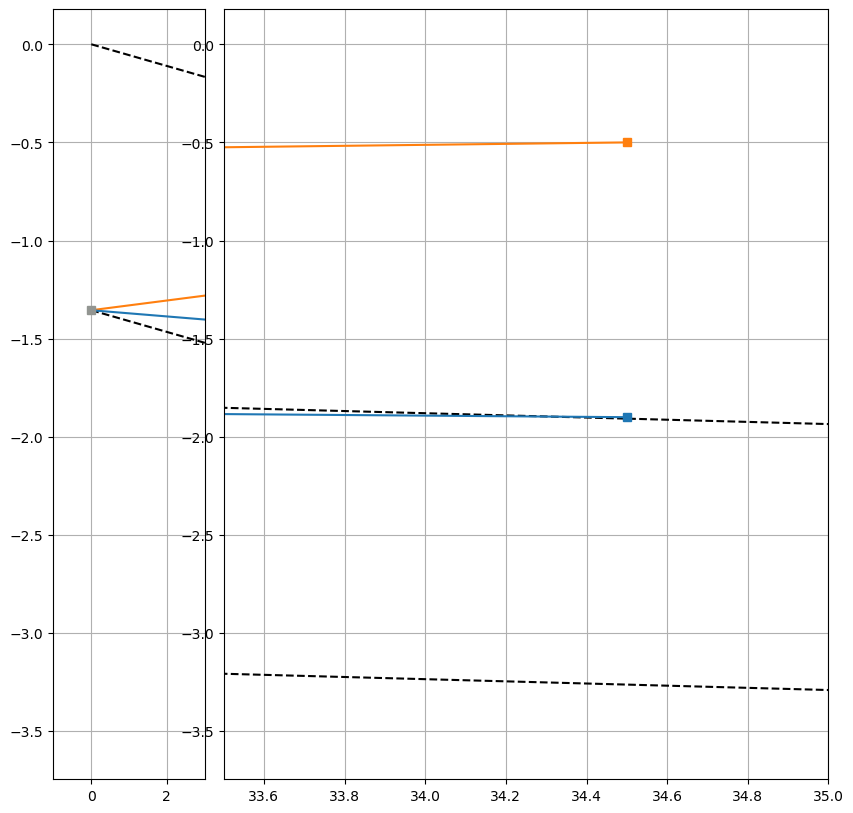

In [18]:


gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.00,width_ratios=[.2,.8])
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,10])
ax = None

ax = fig.add_subplot(gs[0,0])



ax.plot(s[0],fp0,'--',color='k')
# ax.text(30,-1.8615366975842442,' $T_{f}(0 m)$',fontsize=12,rotation=-18)
ax.plot(s[1],fpDepth,'--',color='k')
# ax.text(28,-3.2166114796365517,' $T_{f}(1800 m)$',fontsize=12,rotation=-18)

ax.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1')
ax.plot(Ambient_coord1[0],Ambient_coord1[1],'s',color='C1')

ax.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0')
ax.plot(Ambient_coord2[0],Ambient_coord2[1],'s',color='C0')

ax.plot(SD_coord[0],SD_coord[1],'s',color='xkcd:grey')


ax.set_xlim([-1,3])
# ax.set_ylim([-4,0.5])
ax.grid()

ax = fig.add_subplot(gs[0,1])

ax.plot(s[0],fp0,'--',color='k')
# ax.text(30,-1.8615366975842442,' $T_{f}(0 m)$',fontsize=12,rotation=-18)
ax.plot(s[1],fpDepth,'--',color='k')
# ax.text(28,-3.2166114796365517,' $T_{f}(1800 m)$',fontsize=12,rotation=-18)

ax.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1')
ax.plot(Ambient_coord1[0],Ambient_coord1[1],'s',color='C1')

ax.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0')
ax.plot(Ambient_coord2[0],Ambient_coord2[1],'s',color='C0')

ax.plot(SD_coord[0],SD_coord[1],'s',color='xkcd:grey')


ax.set_xlim([33.5,35])
# ax.set_ylim([-4,0.5])
ax.grid()



# ax.set_ylim(-2000,0)
# ax.set_xticklabels([])

Text(0, 0.5, 'Temperature ($^\\circ$C)')

<Figure size 640x480 with 0 Axes>

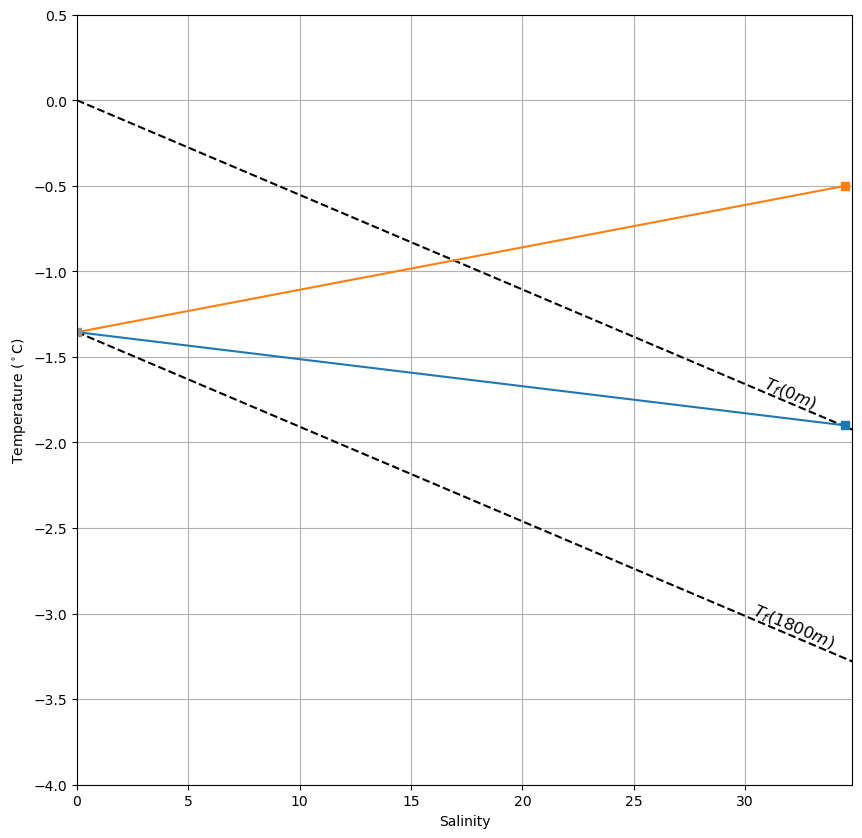

In [19]:
axlims=[0,34.8,-4,0.5]


gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.00)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,10])
ax = None

ax = fig.add_subplot(gs[0,0])

ax.plot(s[0],fp0,'--',color='k')
ax.text(30.5,-1.8,' $T_{f}(0 m)$',fontsize=12,rotation=-23)
ax.plot(s[1],fpDepth,'--',color='k')
ax.text(30,-3.2,' $T_{f}(1800 m)$',fontsize=12,rotation=-23)

# CS = plt.contour(si,ti,dens, levels=np.arange(27,28,0.1), linestyles='dashed', colors='k',linewidths=1)
# plt.clabel(CS, fontsize=9, inline=1, fmt='%2.2f') # Label every second level

ax.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1')
ax.plot(Ambient_coord1[0],Ambient_coord1[1],'s',color='C1')

ax.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0')
ax.plot(Ambient_coord2[0],Ambient_coord2[1],'s',color='C0')

ax.plot(SD_coord[0],SD_coord[1],'s',color='xkcd:grey')




ax.set_xlim([axlims[0],axlims[1]])
ax.set_ylim([axlims[2],axlims[3]])
ax.grid()
ax.set_xlabel('Salinity')
ax.set_ylabel('Temperature ($^\circ$C)')



In [60]:
# meltwater mixing lines
Lf=334
Cp=3.97
Tocean=Ambient_coord2[1]
Socean=Ambient_coord2[0]
S_g2 = np.arange(30,Socean+0.05,0.05)
T_g2 = Tocean + Lf/Cp * (1 - Socean/S_g2)

Tocean1=Ambient_coord1[1]
Socean1=Ambient_coord1[0]
S_g1 = np.arange(30,Socean1+0.05,0.05)
T_g1 = Tocean1 + Lf/Cp * (1 - Socean1/S_g1)

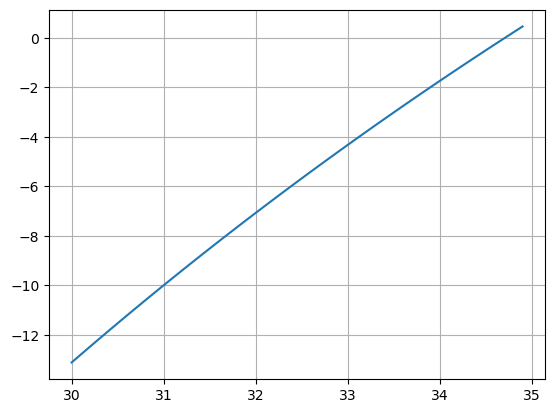

In [21]:
plt.plot(S_g1,T_g1)
plt.grid()

In [22]:
(T_g1[-1]-T_g1[0])/(S_g1[-1]-S_g1[0])

2.7722243473616524

<Figure size 640x480 with 0 Axes>

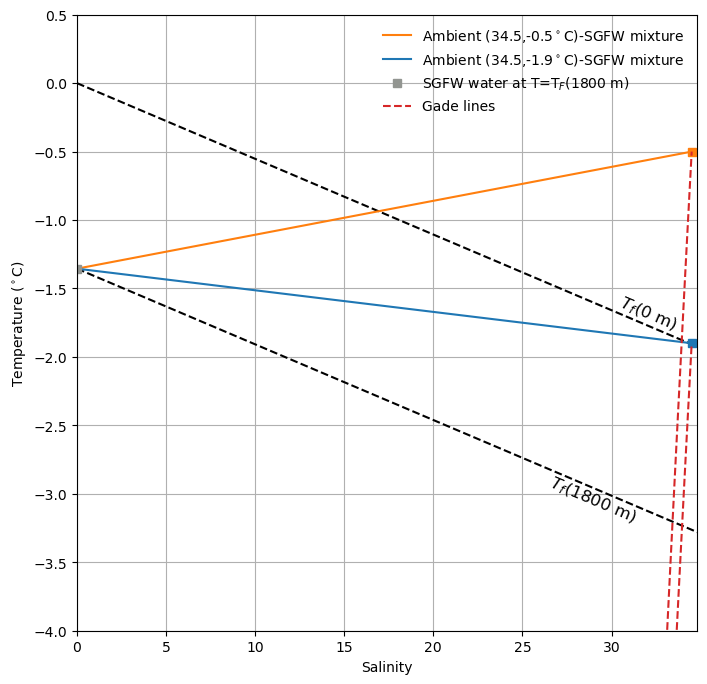

In [61]:
axlims=[0,34.8,-4,0.5]


gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.00)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,8])
ax = None

ax = fig.add_subplot(gs[0,0])

ax.plot(s[0],fp0,'--',color='k')
ax.text(30.0,-1.8,' $T_{f}$(0 m)',fontsize=12,rotation=-23)
ax.plot(s[1],fpDepth,'--',color='k')
ax.text(26.1,-3.2,' $T_{f}$(1800 m)',fontsize=12,rotation=-23)

# CS = plt.contour(si,ti,dens, levels=np.arange(27,28,0.1), linestyles='dashed', colors='k',linewidths=1)
# plt.clabel(CS, fontsize=9, inline=1, fmt='%2.2f') # Label every second level

ax.plot([SD_coord[0],Ambient_coord1[0]],[SD_coord[1],Ambient_coord1[1]],color='C1',label='Ambient (34.5,-0.5$^\circ$C)-SGFW mixture')
ax.plot(Ambient_coord1[0],Ambient_coord1[1],'s',color='C1')

ax.plot([SD_coord[0],Ambient_coord2[0]],[SD_coord[1],Ambient_coord2[1]],color='C0',label='Ambient (34.5,-1.9$^\circ$C)-SGFW mixture')
ax.plot(Ambient_coord2[0],Ambient_coord2[1],'s',color='C0')

# Ambient_coord1=[34.5,-0.5]
# Ambient_coord2=[34.5,-1.9]
        
ax.plot(SD_coord[0],SD_coord[1],'s',color='xkcd:grey',label='SGFW water at T=T$_F$(1800 m)')


ax.plot(S_g1,T_g1,'--',color='C3',label='Gade lines')
ax.plot(S_g2,T_g2,'--',color='C3')

ax.set_xlim([axlims[0],axlims[1]])
ax.set_ylim([axlims[2],axlims[3]])
ax.grid()
ax.set_xlabel('Salinity')
ax.set_ylabel('Temperature ($^\circ$C)')

ax.legend(frameon=False)

plt.savefig('../outputs/figure_s_tsdiagram.png',dpi=300)